In [80]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [82]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [84]:
df.columns
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [86]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors = 'coerce') #if there are any string values they get replaced NaN(Not a Number)

In [88]:
#eda
df.skew(numeric_only=True)
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [94]:
numerical_cat = ["tenure","MonthlyCharges","TotalCharges"]

In [90]:
# NOW TO DESCRIBE THE PROBABILITY OF CHURN BASED ON TENURE, MONTHLY CHARGES, TOTAL CHARGES USING HISTOGRAMS


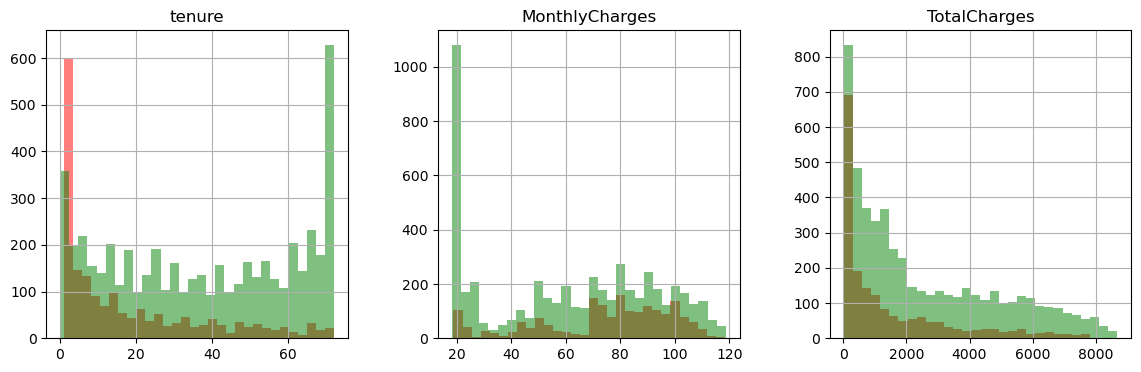

In [100]:
grph, ax = plt.subplots(1 ,3,figsize=(14,4))
df[df.Churn=="Yes"][numerical_cat].hist(bins=30, color="red",alpha=0.5,ax=ax)
df[df.Churn=="No"][numerical_cat].hist(bins=30, color="green",alpha=0.5,ax=ax)
plt.show()

In [108]:
categorical_cats = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]


Text(0.5, 1.0, 'churned')

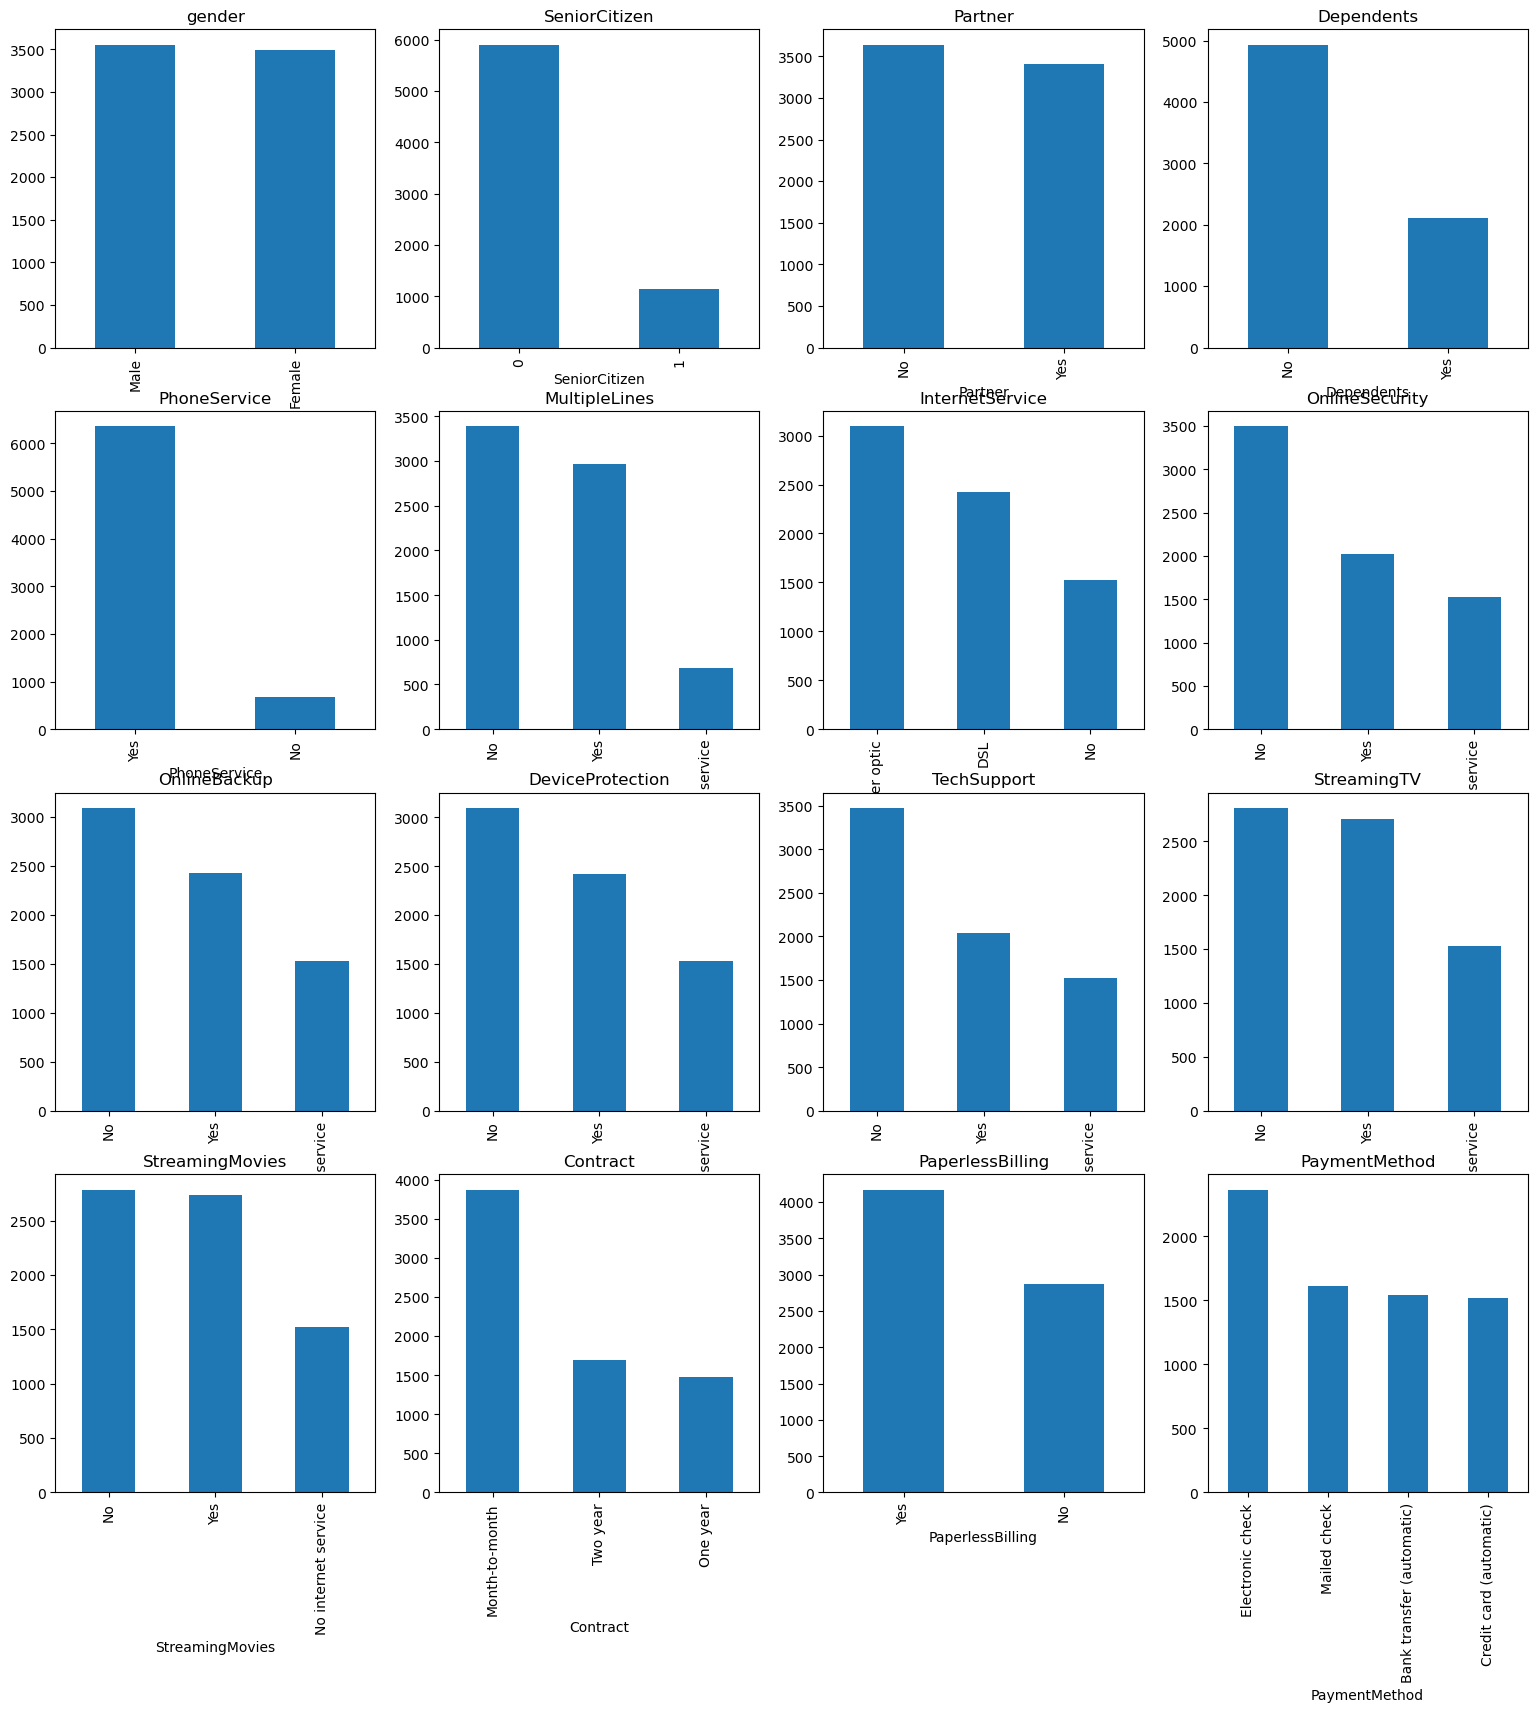

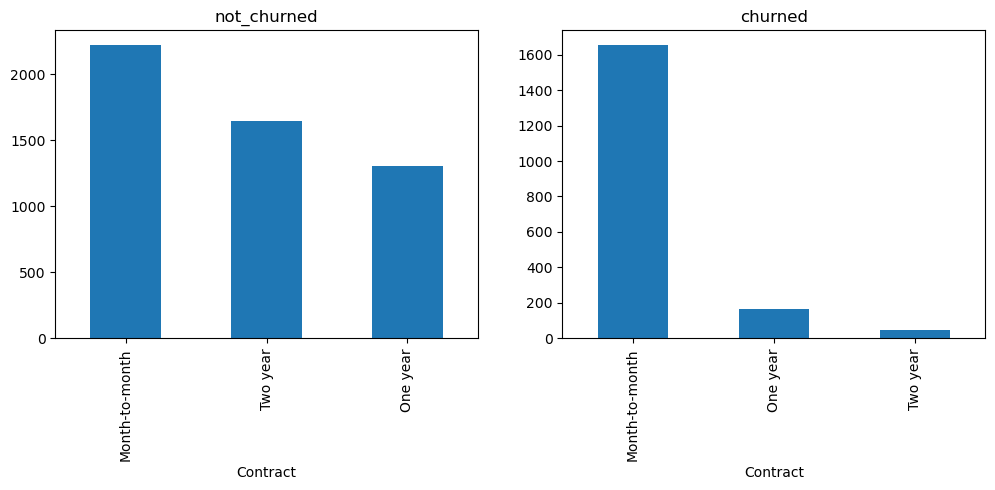

In [133]:
X,Y = 4,4
grph, ax = plt.subplots(X,Y,figsize=(19,19))
x,y = 0,0,
for i, cat in enumerate(categorical_cats):
    if y==Y-1:
        x+=1
    y=i%Y
    df[cat].value_counts().plot(kind='bar',ax=ax[x,y]).set_title(cat)
feature = 'Contract'
grph, ax = plt.subplots(1,2,figsize=(12,4))
df[df.Churn=="No"][feature].value_counts().plot(kind='bar',ax=ax[0]).set_title("not_churned")
df[df.Churn=="Yes"][feature].value_counts().plot(kind='bar',ax=ax[1]).set_title("churned")

Text(0.5, 1.0, 'churned')

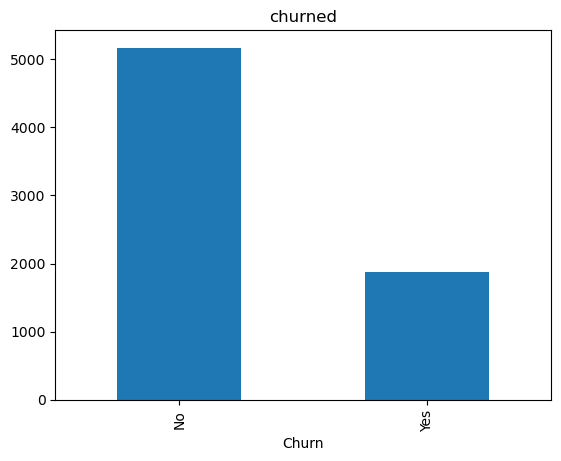

In [137]:
target="Churn"

df["Churn"].value_counts().plot(kind='bar').set_title('churned')

In [143]:
u = ['tenure','MonthlyCharges']
global a
a = []
def count_outliers(data,x):
    q1 = data[x].quantile(0.25,interpolation='nearest')
    q2 = data[x].quantile(0.5,interpolation='nearest')
    q3 = data[x].quantile(0.75,interpolation='nearest')
    q4 = data[x].quantile(1.00,interpolation='nearest')
    iqr = q3-q1
    LLP = q1 - 1.5*iqr
    ULP = q3 + 1.5*iqr
    if data[x].min() < LLP and data[x].max() > ULP:
          print("There are ouliers in",i)
          p = data[data[x]<LLP][x].size
          q = data[data[x]>ULP][x].size
          a.append(i)
          print('The number o;f oultiers are:',p+q)
    else:
        print("no outliers in",i)

for i in u:
    count_outliers(df,i)
        
          

no outliers in tenure
no outliers in MonthlyCharges


In [147]:
df.drop(['customerID'],axis =1,inplace=True)

In [149]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [151]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [153]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [155]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [159]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

In [161]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

In [163]:
#LOGISTIC REGRESSION

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [167]:
predLR = logmodel.predict(X_test)

In [169]:
predLR

array([False, False, False, ..., False, False, False])

In [171]:
Y_test

5616    False
2937    False
1355    False
5441     True
3333    False
        ...  
2797     True
412     False
174     False
5761    False
5895    False
Name: Churn_Yes, Length: 2113, dtype: bool

In [173]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1557
        True       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



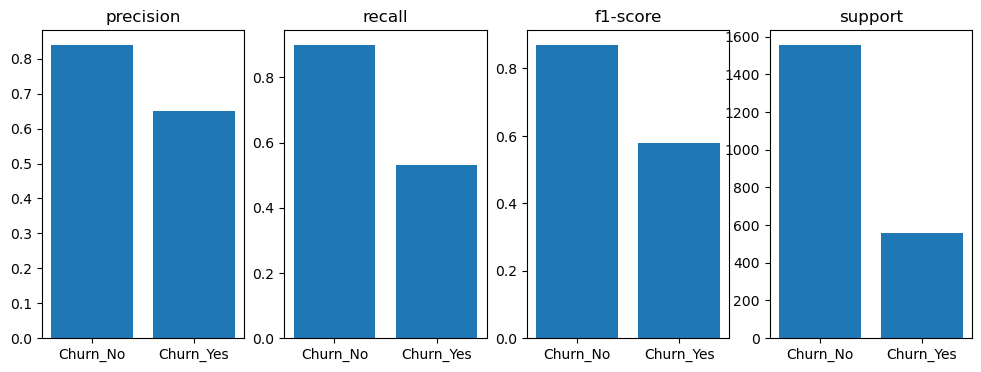

In [177]:

report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])
lines = report.split('\n')
parts = [line.split() for line in lines[2:-5]]
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)


In [179]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

In [181]:

logmodel.score(X_train, Y_train)

0.8064908722109534

In [183]:
accuracy_score(Y_test, predLR)

0.8002839564600095

In [185]:
#decision_tree_classifier

In [187]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [189]:


print(classification_report(Y_test, y_pred_dtc))



              precision    recall  f1-score   support

       False       0.82      0.81      0.81      1557
        True       0.47      0.49      0.48       556

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.72      0.72      2113



In [191]:
dtc.score(X_train,Y_train)

0.9987829614604462

In [193]:
accuracy_score(Y_test, y_pred_dtc)

0.7231424514907714